In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
#To be concaneted to df1
data_1=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_web_data_pt_1.txt")
data_2=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_web_data_pt_2.txt")


In [4]:
#concatenated
df_web_data=pd.concat([data_1,data_2],axis="columns")
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,client_id,visitor_id,visit_id,process_step,date_time
0,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...,...,...,...,...,...
412259,NaN,NaN,NaN,NaN,NaN,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,NaN,NaN,NaN,NaN,NaN,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,NaN,NaN,NaN,NaN,NaN,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,NaN,NaN,NaN,NaN,NaN,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
df_demo=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_demo.txt")
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [7]:
potential_categorical_from_numerical = df_demo.select_dtypes("number").loc[:, df_demo.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,num_accts,calls_6_mnth,logons_6_mnth
0,2.0,6.0,9.0
1,2.0,6.0,9.0
2,2.0,6.0,9.0
3,2.0,3.0,6.0
4,2.0,0.0,3.0
...,...,...,...
70604,3.0,5.0,5.0
70605,2.0,6.0,6.0
70606,2.0,3.0,3.0
70607,3.0,4.0,4.0


In [8]:
df_experiment=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_experiment_clients.txt")
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [9]:
#check for null values
df_demo.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [10]:
#Filling missing values with the mode
df_demo=df_demo.fillna(df_demo.mode().iloc[0])
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [11]:
# Summary statistics for the dataset
df_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70609.000000,70609.000000,70609.000000,70609.000000,7.060900e+04,70609.000000,70609.000000
mean,5.004992e+06,12.051750,150.640995,46.444802,2.255477,1.474222e+05,3.382997,5.567421
std,2.877278e+06,6.871666,82.092083,15.590607,0.534956,3.014833e+05,2.236662,2.353549
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.733040e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.332209e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375217e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [12]:
df_demo.isna().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
dtype: int64

In [12]:
# Calculate the mean 
median_demo = df_demo['clnt_age'].mean()
median_demo

46.44480165418006

In [11]:
#Frequency counts for 
fre_gender=df_demo["gendr"].value_counts()
fre_gender

gendr
U    24136
M    23724
F    22746
X        3
Name: count, dtype: int64

The primary clients using this online platform are undisclosed

In [13]:
# Creating a crosstab table for the 'gendr' column, counting occurrences for each unique value
my_table = pd.crosstab(index = df_demo["gendr"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

col_0,count
gendr,
F,22746
M,23724
U,24136
X,3


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_14164\3109530253.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fre_gender.index, y=fre_gender.values, palette="Set3");


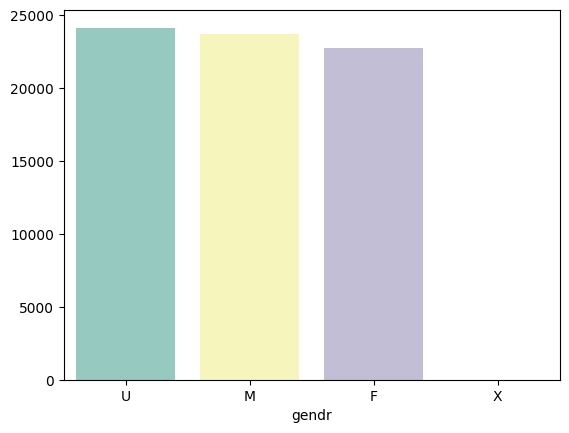

In [38]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=fre_gender.index, y=fre_gender.values, palette="Set3");

<Axes: xlabel='clnt_age', ylabel='Count'>

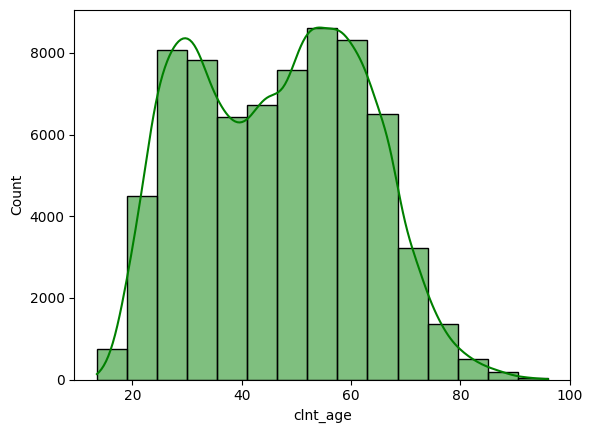

In [32]:
sns.histplot(df_demo['clnt_age'], kde=True, bins=15, color="green")

In [27]:
#Summary statistis for the data frame
df_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70609.000000,70609.000000,70609.000000,70609.000000,7.060900e+04,70609.000000,70609.000000
mean,5.004992e+06,12.051750,150.640995,46.444802,2.255477,1.474222e+05,3.382997,5.567421
std,2.877278e+06,6.871666,82.092083,15.590607,0.534956,3.014833e+05,2.236662,2.353549
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.733040e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.332209e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375217e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [21]:
!pip install scipy

In [36]:
# Generating a crosstab for 'gendr' and 'clnt_age'
crosstab_result = pd.crosstab(df_demo['gendr'], df_demo['clnt_age'])

crosstab_result

clnt_age,13.5,14.0,14.5,15.0,15.5,16.0,16.5,17.0,17.5,18.0,...,91.0,91.5,92.0,92.5,93.0,93.5,94.0,94.5,95.5,96.0
gendr,,,,,,,,,,,,,,,,,,,,,
F,0,1,3,0,6,12,11,12,13,27,...,3,2,2,2,2,1,0,0,1,0
M,0,0,4,8,5,9,8,17,25,38,...,2,4,2,1,0,2,0,0,0,1
U,1,1,16,14,26,19,46,32,85,89,...,1,0,1,1,1,1,3,1,0,1
X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_demo["clnt_age"]

0        60.5
1        58.0
2        32.0
3        49.0
4        33.0
         ... 
70604    38.5
70605    31.0
70606    61.5
70607    68.0
70608    59.5
Name: clnt_age, Length: 70609, dtype: float64